# Preparation with importing libraries and dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [52]:
etf=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Inst%20ETF.csv')
institutional=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20Institutional%20MF.csv') 
retail=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/US%20Sector%20retail%20MF.csv')
sp500=pd.read_csv('https://raw.githubusercontent.com/LinhTo11/Capstone/main/sp500index.csv')

# EDA

# HAIYUAN
## Correlation of etf
sns.heatmap(etf.corr(),cmap='Blues',annot=True)

## Barplot of etf, institutional and retail
sns.barplot(data=etf, x = "ReportDate", y="AssetsEnd")
sns.barplot(data=institutional, x = "ReportDate", y="AssetsEnd")
sns.barplot(data=retail, x = "ReportDate", y="AssetsEnd")

<AxesSubplot:>

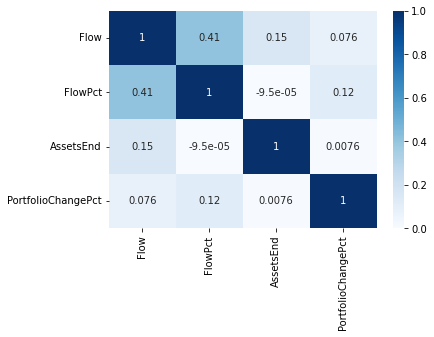

In [17]:
## Correlation of etf
sns.heatmap(etf.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='ReportDate', ylabel='AssetsEnd'>

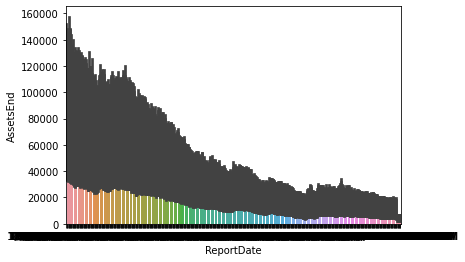

In [16]:
sns.barplot(data=etf, x = "ReportDate", y="AssetsEnd")

In [ ]:
sns.barplot(data=institutional, x = "ReportDate", y="AssetsEnd")

In [ ]:
sns.barplot(data=retail, x = "ReportDate", y="AssetsEnd")

In [18]:
# CARMEN
## 20 assets classes
etf['AssetClass'].nunique()

## Count of each asset class and portfolio change in etf
etf.groupby('AssetClass')['AssetClass'].count()
etf.groupby('AssetClass')['PortfolioChangePct'].describe().T

## Count of each asset class and portfolio change in sector
institutional.groupby('AssetClass')['PortfolioChangePct'].describe().T

## Count of each asset class and portfolio change in retail
retail.groupby('AssetClass')['PortfolioChangePct'].describe().T

AssetClass,Commodities/Materials-North America-USA-North America-Equity,Consumer Goods-North America-USA-North America-Equity,Energy-North America-USA-North America-Equity,Financials-North America-USA-North America-Equity,Health Care/Biotech-North America-USA-North America-Equity,Industrials-North America-USA-North America-Equity,Infrastructure-North America-USA-North America-Equity,Large Cap Blend-North America-USA-North America-Equity,Large Cap Growth-North America-USA-North America-Equity,Large Cap Value-North America-USA-North America-Equity,Mid Cap Blend-North America-USA-North America-Equity,Mid Cap Growth-North America-USA-North America-Equity,Mid Cap Value-North America-USA-North America-Equity,Real Estate-North America-USA-North America-Equity,Small Cap Blend-North America-USA-North America-Equity,Small Cap Growth-North America-USA-North America-Equity,Small Cap Value-North America-USA-North America-Equity,Technology-North America-USA-North America-Equity,Telecom-North America-USA-North America-Equity,Utilities-North America-USA-North America-Equity
count,542.000000,542.000000,579.000000,579.000000,579.000000,277.000000,43.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.076266,0.166390,0.116550,0.084781,0.223689,0.250012,0.270244,0.138930,0.155593,0.136382,0.156767,0.164741,0.165956,0.153375,0.167121,0.177037,0.177585,0.198219,0.051725,0.100881
std,3.568088,1.838836,3.838202,3.029889,2.463254,2.193952,1.704602,2.240146,2.395937,2.299457,2.321900,2.638032,2.389025,3.617641,2.779511,2.811379,2.798901,2.619945,2.631449,2.025641
min,-18.696500,-11.968500,-21.864000,-18.581500,-13.053000,-6.866000,-3.720600,-14.958400,-14.977600,-15.857200,-14.549600,-16.460900,-15.486500,-20.246400,-18.057600,-17.706500,-17.370400,-15.076800,-15.944500,-13.957500
25%,-1.542525,-0.638025,-1.383200,-0.875350,-1.021400,-0.918300,-0.651400,-0.803900,-0.882950,-0.790950,-0.907300,-1.145700,-0.793350,-1.286850,-1.157150,-1.291250,-1.142100,-1.141500,-1.111150,-0.862750
50%,0.209750,0.341400,0.357800,0.241300,0.494100,0.358000,0.326700,0.282200,0.367500,0.309200,0.376200,0.421900,0.358300,0.353900,0.351500,0.385100,0.382900,0.452800,0.304700,0.230800
75%,2.074425,1.181100,2.091100,1.293100,1.705300,1.633800,1.270200,1.305500,1.529050,1.297400,1.532200,1.734800,1.464400,1.804900,1.747250,1.877250,1.697900,1.759350,1.417250,1.259550
max,18.968100,6.780900,14.861300,19.900000,8.269900,8.843300,3.628800,9.301200,8.651100,10.217300,9.395700,11.233300,9.857000,22.161500,12.651400,12.180500,12.815200,10.200700,13.870100,9.481600


In [19]:
etf['ReportDate'] = pd.to_datetime(etf['ReportDate'])
#extract date from datetime 
etf['Date'] = pd.to_datetime(etf['ReportDate']).dt.date

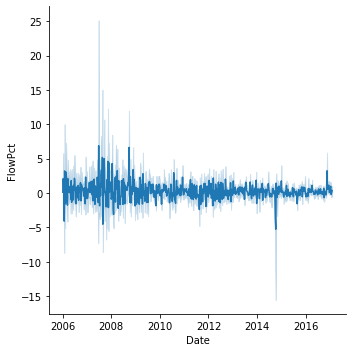

In [20]:
sns.relplot(data = etf, x = 'Date', y = 'FlowPct', kind = 'line')

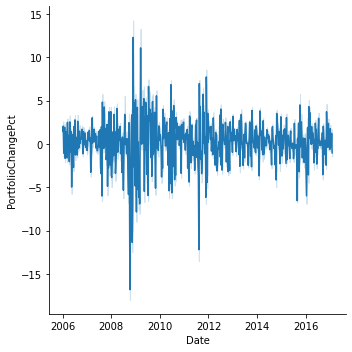

In [21]:
sns.relplot(data = etf, x = 'Date', y = 'PortfolioChangePct', kind = 'line')

In [22]:
etf['Month'] = pd.DatetimeIndex(etf['Date']).month
etf['Month'].head()

0    2
1    2
2    2
3    2
4    2
Name: Month, dtype: int64

In [23]:
january_etf = etf.query('Month == 1')

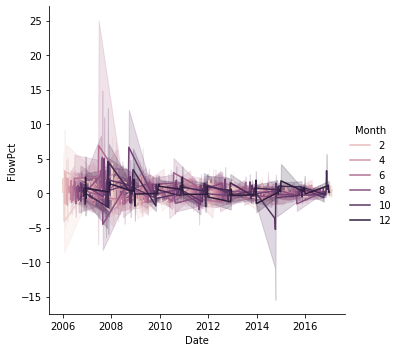

In [24]:
sns.relplot(data = etf, x = 'Date', y = 'FlowPct', kind = 'line', hue = 'Month' )

In [34]:
etf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11003 entries, 0 to 11002
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ReportDate          11003 non-null  datetime64[ns]
 1   AssetClass          11003 non-null  object        
 2   Flow                11003 non-null  float64       
 3   FlowPct             11003 non-null  float64       
 4   AssetsEnd           11003 non-null  float64       
 5   PortfolioChangePct  11003 non-null  float64       
 6   Date                11003 non-null  object        
 7   Month               11003 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 687.8+ KB


In [ ]:
## Song Lin
# convert ReportDate to Datetime format
etf['ReportDate'] = etf['ReportDate'].map(lambda x: x.replace(' 12:00:00 AM', 0))


In [ ]:
etf['ReportDate'][0]
etf['ReportDate'] = etf['ReportDate'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [48]:
# rearrange dataset based on porfolio and date
etf = etf.sort_values(by=['AssetClass', 'ReportDate'])
etf = etf.set_index('ReportDate')
etf.AssetClass.unique()

array(['Commodities/Materials-North America-USA-North America-Equity',
       'Consumer Goods-North America-USA-North America-Equity',
       'Energy-North America-USA-North America-Equity',
       'Financials-North America-USA-North America-Equity',
       'Health Care/Biotech-North America-USA-North America-Equity',
       'Industrials-North America-USA-North America-Equity',
       'Infrastructure-North America-USA-North America-Equity',
       'Large Cap Blend-North America-USA-North America-Equity',
       'Large Cap Growth-North America-USA-North America-Equity',
       'Large Cap Value-North America-USA-North America-Equity',
       'Mid Cap Blend-North America-USA-North America-Equity',
       'Mid Cap Growth-North America-USA-North America-Equity',
       'Mid Cap Value-North America-USA-North America-Equity',
       'Real Estate-North America-USA-North America-Equity',
       'Small Cap Blend-North America-USA-North America-Equity',
       'Small Cap Growth-North America-USA-

In [49]:
def threemplot(x = 'Commodities/Materials-North America-USA-North America-Equity'):
    etf_1 = etf[etf['AssetClass'] == x]
    etf_1 = etf_1.resample('3M').mean()
    etf_1 = etf_1.reset_index()
    etf_1['ReportDate'] = etf_1['ReportDate'].astype(str)
    etf_1['ReportDate'] = etf_1['ReportDate'].str[:7]
    sns.lineplot(x='ReportDate', y="PortfolioChangePct", data=etf_1)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()
  # This function takes the portfolio names as inputs and outputs the average PortfolioChangePct for every three months

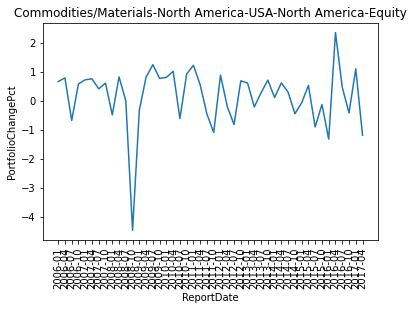

In [50]:
# demonstration
threemplot('Commodities/Materials-North America-USA-North America-Equity')

In [53]:
## Zichen

sp500['close_lastday']=sp500['close'].shift(1)
sp500['price_change_percent']=(sp500['close']/sp500['close_lastday']-1)*100
sp500['weekly']=sp500.rolling(window=5, center=True, on='price_change_percent', axis=0, closed=None)['price_change_percent'].mean()
sp500.head(3)

,date,close,close_lastday,price_change_percent,weekly
0,02-Jan-86,209.59,NaN,NaN,NaN
1,03-Jan-86,210.88,209.59,0.615487,NaN
2,06-Jan-86,210.65,210.88,-0.109067,NaN


In [ ]:
combine=pd.merge(sp500, retailrolling, how='inner', left_on='date', right_on='ReportDate')

In [ ]:
result=pd.DataFrame(columns=retail.columns)
for i in retail['AssetClass'].unique():
  retailrolling=retail[retail['AssetClass']==i]
  retailrolling['3weekrolling']=retailrolling.rolling(window=35, center=True, on='PortfolioChangePct', axis=0, closed=None)['PortfolioChangePct'].mean()
  result=pd.concat([result,retailrolling])

In [ ]:
for i in retail['AssetClass'].unique():
  retailrolling=retail[retail['AssetClass']==i]
  retailrolling['pricechange']=retailrolling['PortfolioChangePct']/100+1
  retailrolling.sort_index(ascending=False)
  retailrolling['price']=retailrolling['pricechange'].cumprod(axis=0)

In [ ]:
retailrolling

In [ ]:
sns.relplot(
    data=result[result['AssetClass']=='Commodities/Materials-North America-USA-North America-Equity'],kind='line'
    ,x="ReportDate", y="3weekrolling",
    hue="AssetClass")

In [ ]:
sns.relplot(
    data=retailrolling, kind="line",
    x="ReportDate", y="price",
    hue="AssetClass")

In [ ]:
import matplotlib.pyplot as plt
plt.plot('ReportDate','ProtfolioChangePct',data=retail,hue='AssetClass')